In [104]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png"))
options(jupyter.plot_scale = 1.5)
require("pacman")
pacman::p_load(tidyverse, ggplot2, latex2exp, fpp2, 
               ggfortify, ggpubr, zoo, lubridate, mgcv)


Family: gaussian 
Link function: identity 

Formula:
Value ~ s(as.numeric(homeownership$Date)) + qs - 1

Parametric coefficients:
     Estimate Std. Error t value Pr(>|t|)    
qsQ1 65.55967    0.05666    1157   <2e-16 ***
qsQ2 65.63608    0.05662    1159   <2e-16 ***
qsQ3 65.60369    0.05662    1159   <2e-16 ***
qsQ4 65.56246    0.05666    1157   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                    edf Ref.df     F p-value    
s(as.numeric(homeownership$Date)) 8.617  8.958 382.6  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.954   Deviance explained =  100%
GCV = 0.14555  Scale est. = 0.13462   n = 168

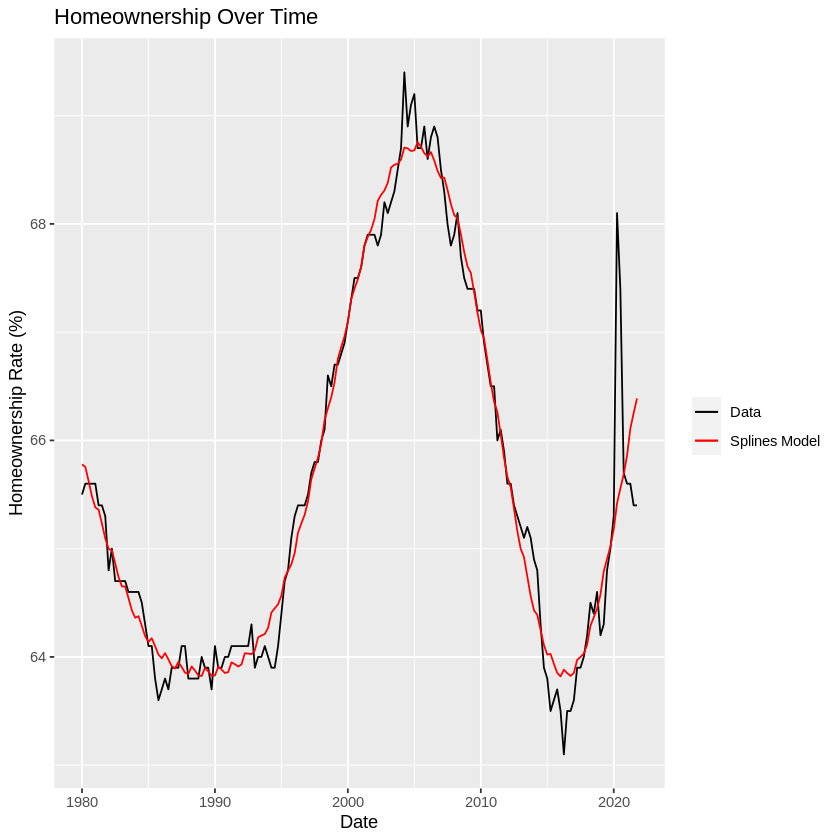

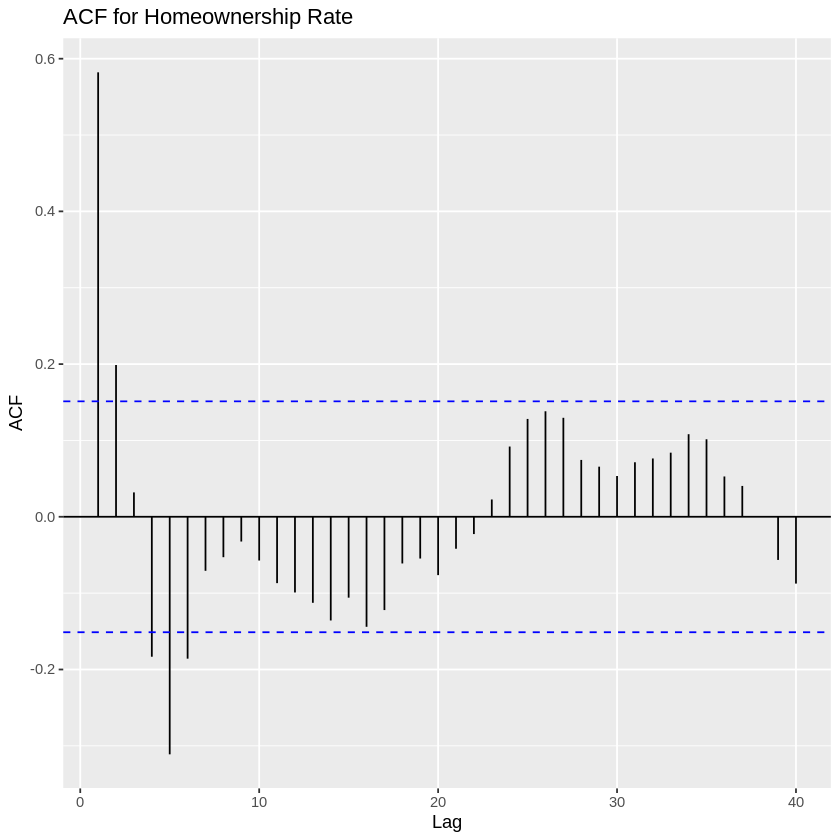

In [117]:
homeownership <- read_csv("Data/Homeownership Rate-1.csv", skip = 6, show_col_types = FALSE) %>% drop_na()
homeownership$Date <- as.Date(as.yearqtr(homeownership$Period, format = "Q%q-%Y"))
homeownership <- homeownership %>% select(-Period)
qs <- as.factor(quarters(homeownership$Date))

homeownership_splines <- gam(Value ~ s(as.numeric(homeownership$Date)) + qs - 1 , data = homeownership)

summary(homeownership_splines)

homeownership %>% ggplot() + 
    geom_line(aes(x = Date, y = Value, color = "Data")) + 
    geom_line(aes(x = Date, y = fitted(homeownership_splines), color = "Splines Model"))+
    labs(x = "Date", y = "Homeownership Rate (%)", title = "Homeownership Over Time") +
    scale_color_manual("", values = c("Data" = "black", "Splines Model" = "red"))

ggAcf(homeownership_splines$resid, lag.max = 40) + labs(title = "ACF for Homeownership Rate")


Family: gaussian 
Link function: identity 

Formula:
Rate ~ s(as.numeric(interest_rate$Date)) + months - 1

Parametric coefficients:
         Estimate Std. Error t value Pr(>|t|)    
months1    4.5617     0.2254   20.24   <2e-16 ***
months2    4.5171     0.2254   20.04   <2e-16 ***
months3    4.5406     0.2254   20.14   <2e-16 ***
months4    4.6074     0.2271   20.29   <2e-16 ***
months5    4.6184     0.2271   20.34   <2e-16 ***
months6    4.6759     0.2271   20.59   <2e-16 ***
months7    4.6727     0.2254   20.73   <2e-16 ***
months8    4.6946     0.2254   20.83   <2e-16 ***
months9    4.6919     0.2254   20.82   <2e-16 ***
months10   4.6564     0.2254   20.66   <2e-16 ***
months11   4.6147     0.2254   20.47   <2e-16 ***
months12   4.6127     0.2254   20.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                    edf Ref.df   F p-value    
s(as.numeric(interest_rate$Date)) 8.891  8.

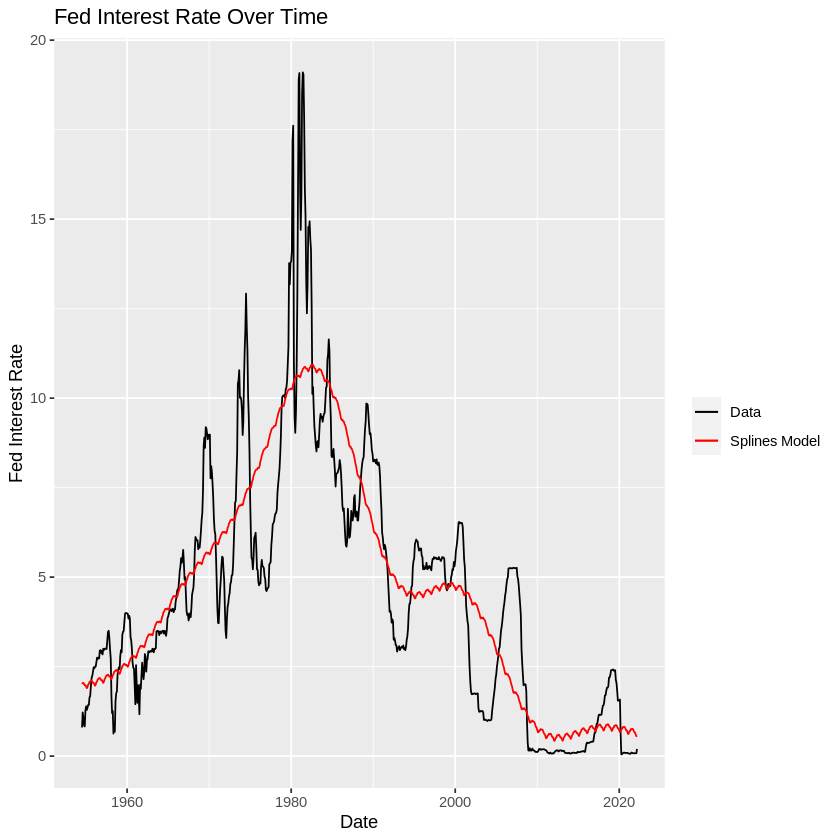

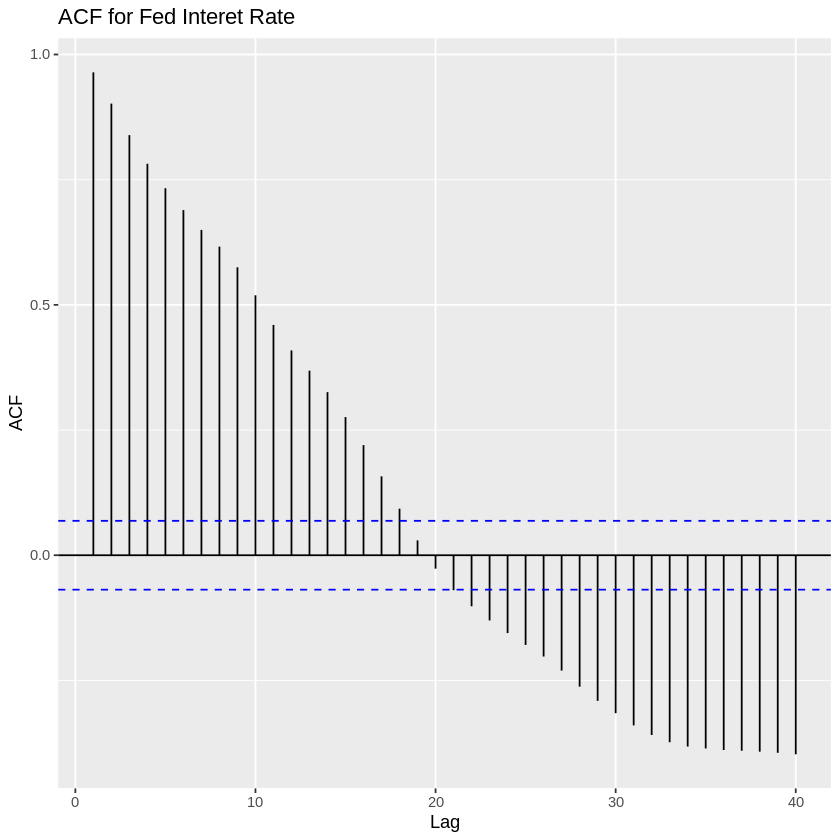

In [107]:
interest_rate <- read_csv("Data/Interest Rate.csv", show_col_types = FALSE) %>% drop_na()
colnames(interest_rate) <- c("Date", "Rate")
months <- as.factor(month(interest_rate$Date))

interest_rate_splines <- gam(Rate ~ s(as.numeric(interest_rate$Date)) + months - 1, data = interest_rate)
summary(interest_rate_splines)

interest_rate %>% ggplot() + 
    geom_line(aes(x = Date, y = Rate, color = "Data")) + 
    geom_line(aes(x = Date, y = fitted(interest_rate_splines), color = "Splines Model"))+
    labs(x = "Date", y = "Fed Interest Rate", title = "Fed Interest Rate Over Time") +
    scale_color_manual("", values = c("Data" = "black", "Splines Model" = "red"))

ggAcf(interest_rate_splines$resid, lag.max = 40) + labs(title = "ACF for Fed Interet Rate")


Family: gaussian 
Link function: identity 

Formula:
GDP ~ s(as.numeric(gdp$Date)) + qs - 1

Parametric coefficients:
     Estimate Std. Error t value Pr(>|t|)    
qsQ1  8960.83      24.24   369.7   <2e-16 ***
qsQ2  8948.95      24.24   369.3   <2e-16 ***
qsQ3  8967.13      24.24   370.0   <2e-16 ***
qsQ4  8966.66      24.24   369.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df     F p-value    
s(as.numeric(gdp$Date)) 8.923  8.998 21539  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.998   Deviance explained =  100%
GCV =  46031  Scale est. = 44049     n = 300

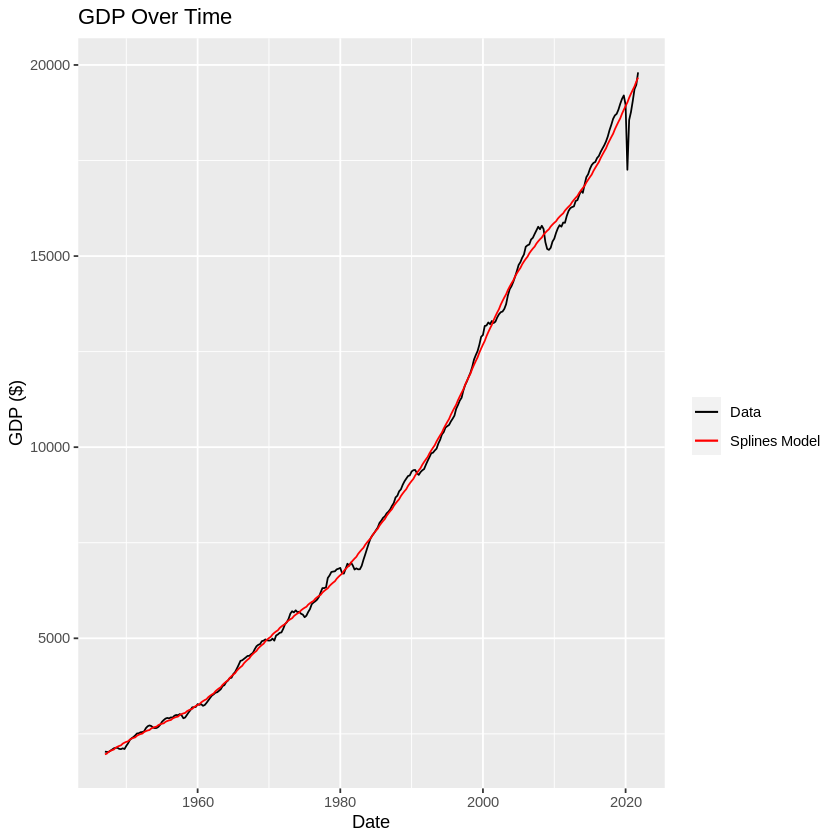

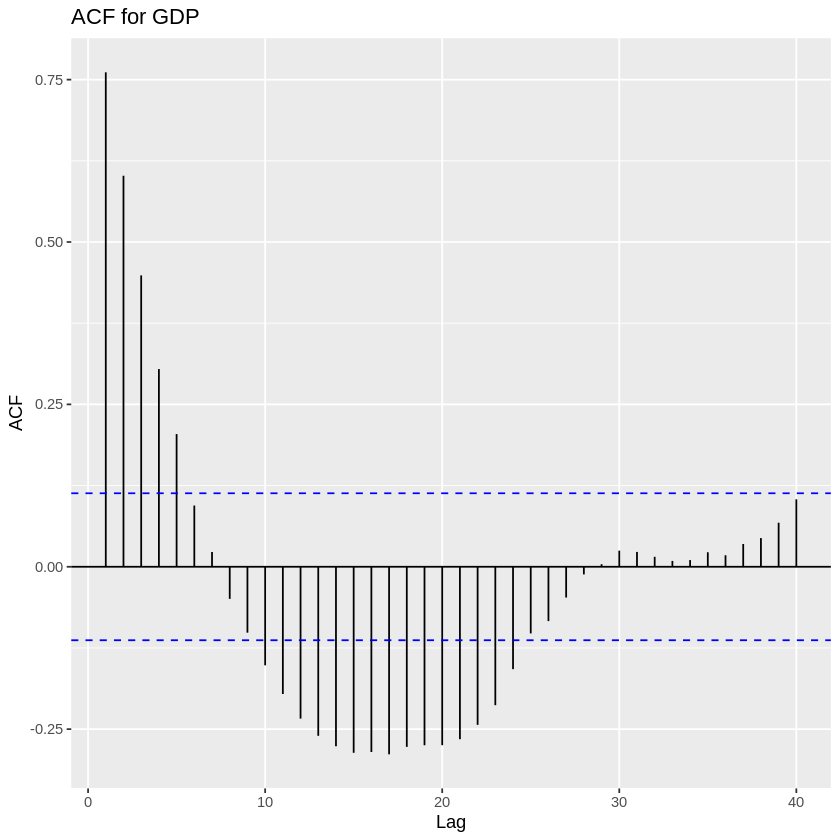

In [115]:
gdp <- read_csv("Data/Real GDP by Quarter.csv", show_col_types = FALSE) %>% drop_na()
colnames(gdp) <- c("Date", "GDP")
qs <- as.factor(quarters(gdp$Date))

gdp_splines <- gam(GDP ~ s(as.numeric(gdp$Date)) + qs - 1, data = gdp)
summary(gdp_splines)

gdp %>% ggplot() + 
    geom_line(aes(x = Date, y = GDP, color = "Data")) + 
    geom_line(aes(x = Date, y = fitted(gdp_splines), color = "Splines Model")) +
    labs(x = "Date", y = "GDP ($)", title = "GDP Over Time") +
    scale_color_manual("", values = c("Data" = "black", "Splines Model" = "red"))

ggAcf(gdp_splines$resid, lag.max = 40) + labs(title = "ACF for GDP")


Family: gaussian 
Link function: identity 

Formula:
Price ~ s(as.numeric(sales_price$Date)) + qs - 1

Parametric coefficients:
     Estimate Std. Error t value Pr(>|t|)    
qsQ1   142681       1322   107.9   <2e-16 ***
qsQ2   142870       1322   108.1   <2e-16 ***
qsQ3   141834       1322   107.3   <2e-16 ***
qsQ4   143420       1322   108.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                  edf Ref.df    F p-value    
s(as.numeric(sales_price$Date)) 8.802  8.988 2599  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.99   Deviance explained = 99.7%
GCV = 1.0901e+08  Scale est. = 1.031e+08  n = 236

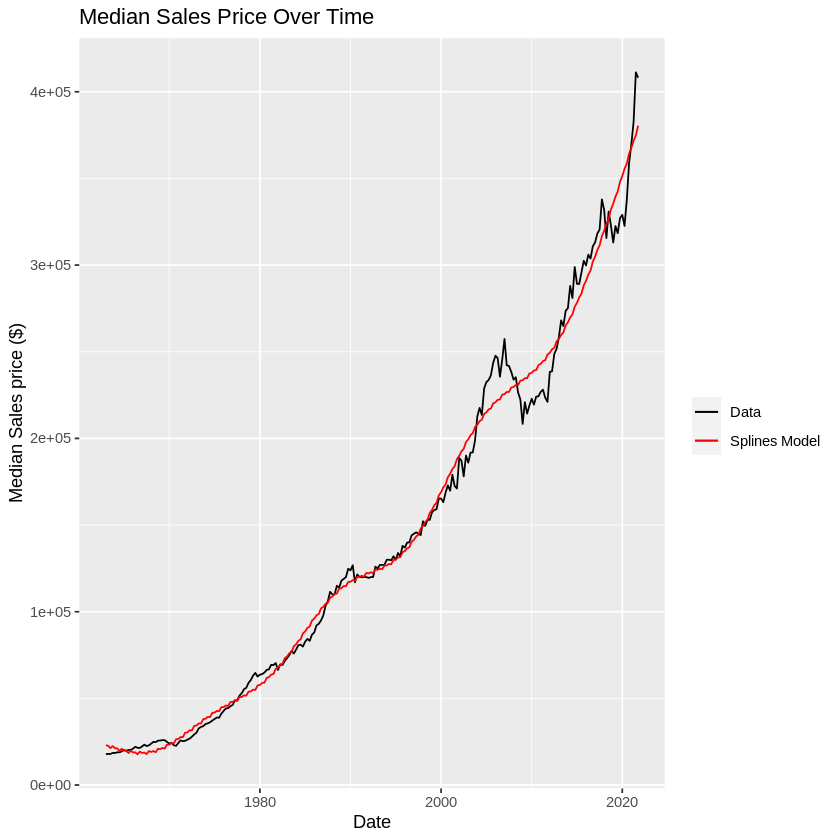

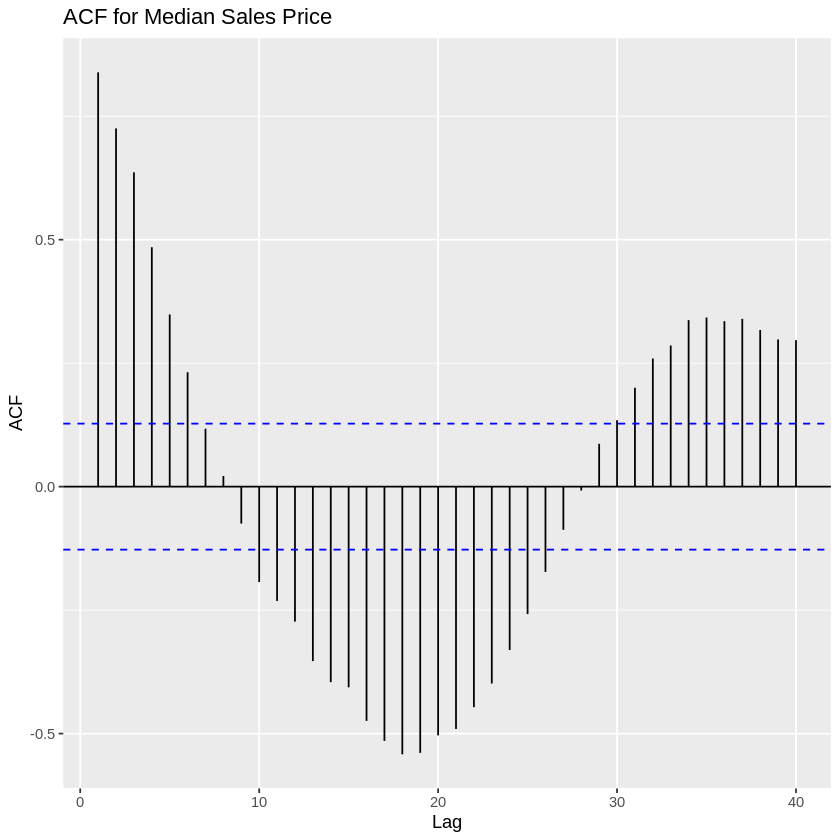

In [116]:
sales_price <- read_csv("Data/Median Sales Price of Houses Sold by Quarter.csv", show_col_types = FALSE) %>% drop_na()
colnames(sales_price) <- c("Date", "Price")
qs <- as.factor(quarters(sales_price$Date))

sales_price_splines <- gam(Price ~ s(as.numeric(sales_price$Date)) + qs - 1, data = sales_price)
summary(sales_price_splines)

sales_price %>% ggplot() + 
    geom_line(aes(x = Date, y = Price, color = "Data")) + 
    geom_line(aes(x = Date, y = fitted(sales_price_splines), color = "Splines Model")) +
    labs(x = "Date", y = "Median Sales price ($)", title = "Median Sales Price Over Time") +
    scale_color_manual("", values = c("Data" = "black", "Splines Model" = "red"))

ggAcf(sales_price_splines$resid, lag.max = 40) + labs(title = "ACF for Median Sales Price")